# Visualization:
This notebook imports the merged USV call spreadsheets

### Imports, settings, and functions

In [1]:
## Install the neccessary imports and check working directory

import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid") # prettier plots
from matplotlib import pylab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(os.getcwd())

/Users/zacharygutierrez/A_Drive/StowersLab


In [3]:
## Increase the width of all cells for just this notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
## Function to create a list, ensure sex and atribute are strings

def get_list(sex, attribute):
    """Create a list with five mean values for every
       stimulation freq per sex/attribute"""
    
    stim_list = ['1','5','10','25','50']
    mean_list = []
    
    for val in stim_list:
        mean = np.mean(total_calls[(total_calls.Sex == sex) & (total_calls.Stimulation == val)][attribute])
        mean_list.append(mean)
    
    return mean_list

In [5]:
## Function for creating bar graphs out of call data
## NOTE: First two argument lists should have five (5) elements
##       and the third arg should be a string

## TODO: add in std parameter
def plot_list(maleList, femaleList, attribute):
    """Plots a bar chart comparing elements at 
       the same index within each list."""
    
    fig, ax = plt.subplots()
    n_groups = 5
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, maleList, bar_width,
                    alpha=opacity, color='b',
                    #yerr=std_male, 
                    error_kw=error_config)#, label='male')

    rects2 = ax.bar(index + bar_width, femaleList, bar_width,
                    alpha=opacity, color='r',
                    #yerr=std_female,
                    error_kw=error_config)#, label='female')

    ax.set_xlabel('Stimulation')
    ax.set_ylabel(attribute)
    ax.set_title('Average ' + attribute)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(('1Hz', '5Hz', '10Hz', '25Hz', '50Hz'))
    
   # pylab.legend(loc='lower left')   # i was trying this line to move the legend
    os.chdir('/Users/zacharygutierrez/Desktop')
    #pylab.savefig(attribute + '.png')
   # ax.legend()

    fig.tight_layout()
    plt.show()

In [6]:
## Function for creating bar graphs out of call data
## NOTE: The three argument lists should have five (5) elements
##       and the fourth arg should be a string

## TODO: add in std parameter
def scatter_list(list_1, list_2, list_3, attribute):
    """Scatters the data comparing elements at 
       the same index within each list."""
    
    fig, ax = plt.subplots()
    n_groups = 5
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    spots1 = ax.bar(index, list_1,
                    alpha=opacity, color='b')

    spots2 = ax.bar(index + bar_width, list_2,
                    alpha=opacity, color='r')
                    
    spots3 = ax.bar(index + bar_width + bar_width, list_3,
                    alpha=opacity, color='g')
    
    ax.set_xlabel('Stimulation')
    ax.set_ylabel(attribute)
    ax.set_title('Average ' + attribute)
    ax.set_xticks(index + bar_width / 3)
    ax.set_xticklabels(('1Hz', '5Hz', '10Hz', '25Hz', '50Hz'))
    
   # pylab.legend(loc='lower left')   # i was trying this line to move the legend
    os.chdir('/Users/zacharygutierrez/Desktop')
    #pylab.savefig(attribute + '.png')
   # ax.legend()

    fig.tight_layout()
    plt.show()

In [7]:
## Function for plotting different bouts against each other
## All calls vs. calls within 5-10 (lights on) seconds vs. calls >10 seconds (light off)

def plot_feature(feature, info):
    
    stim_list  = [1,5,10,25,50]
    list_full  = [] # list of mean features for all calls for every stimulation
    list_on    = [] # list of mean features for calls within 5-10 seconds
    list_off   = [] # list of mean features for calls after 10 seconds

    for val in stim_list:
        full = np.mean(total_calls[(total_calls.Stimulation == val)][feature])
        list_full.append(full)
        
        on = np.mean(lights_on[(lights_on.Stimulation == val)][feature])
        list_on.append(on)
        
        off = np.mean(lights_off[(lights_off.Stimulation == val)][feature])
        list_off.append(off)

    matrix = np.array([list_full, list_on, list_off])
    matrix = matrix.transpose()
    df2 = pd.DataFrame(matrix, columns = ['All Calls', 'Lights on', 'Lights off'], 
                                 index = ['1Hz','5Hz','10Hz','25Hz','50Hz'])
    
    ax = df2.plot.bar()
    ax.set_title('Average ' + feature + ' ' + info)
    ax.set_ylabel(feature)
    
    # 'Mean Power' is negative so move legend up
    if feature == 'Mean Power (dB/Hz)': 
        ax.legend(loc='upper center')
    else:
        ax.legend(loc='lower center')
        
    # Change to dir where you want to save the plots
    os.chdir('/Users/zacharygutierrez/Desktop')
    
    # This line is needed for Linux or Mac (removes forward slash)
    if feature == 'Mean Power (dB/Hz)': 
        pylab.savefig('Mean Power (dB\Hz)' + '.png')
    else:
        pylab.savefig(feature + '.png')

In [8]:
## Function takes in one attribute, one dataframe, and a title
## Creates a boxplot with a categorical strip plot overlayed

def plot_strip(feature, df, title):

    ax = sns.boxplot(x="Stimulation", y=feature, data=df, 
                     order=['1','5','10','25','50'], whis=np.inf)

    ax = sns.stripplot(x="Stimulation", y=feature, data=df,
                       order=['1','5','10','25','50'], color="0.3")
    
    ax.set_title('Data: ' + title)
    
     # Change to dir where you want to save the plots
    os.chdir('/Users/zacharygutierrez/Desktop')
    
    # This line is needed for Linux or Mac (removes forward slash)
    if feature == 'Mean Power (dB/Hz)': 
        pylab.savefig('Mean Power (dB\Hz)' + '.png')
    else:
        pylab.savefig(feature + '.png')

## Import the data, separate and visualize

In [9]:
## Pick the directory and load the files

os.chdir('/Users/zacharygutierrez/Desktop/catch')

total_calls = pd.read_excel('total_calls.xlsx')
male_df = pd.read_excel("male_df.xlsx")
female_df = pd.read_excel("female_df.xlsx")
lights_on = pd.read_excel('lights_on.xlsx')
lights_off = pd.read_excel('lights_off.xlsx')

In [33]:
## Troubleshooting...
# plot_feature('Call Length (s)', 'info')
# plot_feature('Low Freq (kHz)')
# plot_feature('High Freq (kHz)')
# plot_feature('Delta Freq (kHz)')
# plot_feature('Mean Power (dB/Hz)')

In [15]:
print(os.getcwd())

/Users/zacharygutierrez/Desktop/catch


In [16]:
# Male lights on
male_1_on = lights_on[(lights_on['Sex'] == 'male' ) & (lights_on['Stimulation'] == 1)]
male_5_on = lights_on[(lights_on['Sex'] == 'male' ) & (lights_on['Stimulation'] == 5)]
male_10_on = lights_on[(lights_on['Sex'] == 'male' ) & (lights_on['Stimulation'] == 10)]
male_25_on = lights_on[(lights_on['Sex'] == 'male' ) & (lights_on['Stimulation'] == 25)]
male_50_on = lights_on[(lights_on['Sex'] == 'male' ) & (lights_on['Stimulation'] == 50)]

# Female lights on
female_1_on = lights_on[(lights_on['Sex'] == 'female' ) & (lights_on['Stimulation'] == 1)]
female_5_on = lights_on[(lights_on['Sex'] == 'female' ) & (lights_on['Stimulation'] == 5)]
female_10_on = lights_on[(lights_on['Sex'] == 'female' ) & (lights_on['Stimulation'] == 10)]
female_25_on = lights_on[(lights_on['Sex'] == 'female' ) & (lights_on['Stimulation'] == 25)]
female_50_on = lights_on[(lights_on['Sex'] == 'female' ) & (lights_on['Stimulation'] == 50)]

# Male lights off
male_1_off = lights_off[(lights_off['Sex'] == 'male' ) & (lights_off['Stimulation'] == 1)]
male_5_off = lights_off[(lights_off['Sex'] == 'male' ) & (lights_off['Stimulation'] == 5)]
male_10_off = lights_off[(lights_off['Sex'] == 'male' ) & (lights_off['Stimulation'] == 10)]
male_25_off = lights_off[(lights_off['Sex'] == 'male' ) & (lights_off['Stimulation'] == 25)]
male_50_off = lights_off[(lights_off['Sex'] == 'male' ) & (lights_off['Stimulation'] == 50)]

# Female lights off
female_1_off = lights_off[(lights_off['Sex'] == 'female' ) & (lights_off['Stimulation'] == 1)]
female_5_off = lights_off[(lights_off['Sex'] == 'female' ) & (lights_off['Stimulation'] == 5)]
female_10_off = lights_off[(lights_off['Sex'] == 'female' ) & (lights_off['Stimulation'] == 10)]
female_25_off = lights_off[(lights_off['Sex'] == 'female' ) & (lights_off['Stimulation'] == 25)]
female_50_off = lights_off[(lights_off['Sex'] == 'female' ) & (lights_off['Stimulation'] == 50)]

In [17]:
## Change to the appropriate directory and export

os.chdir('/Users/zacharygutierrez/Desktop/catch')

male_1_on.to_excel("male_1_on.xlsx")
male_5_on.to_excel("male_5_on.xlsx")
male_10_on.to_excel("male_10_on.xlsx")
male_25_on.to_excel("male_25_on.xlsx")
male_50_on.to_excel("male_50_on.xlsx")

female_1_on.to_excel("female_1_on.xlsx")
female_5_on.to_excel("female_5_on.xlsx")
female_10_on.to_excel("female_10_on.xlsx")
female_25_on.to_excel("female_25_on.xlsx")
female_50_on.to_excel("female_50_on.xlsx")

male_1_off.to_excel("male_1_off.xlsx")
male_5_off.to_excel("male_5_off.xlsx")
male_10_off.to_excel("male_10_off.xlsx")
male_25_off.to_excel("male_25_off.xlsx")
male_50_off.to_excel("male_50_off.xlsx")

female_1_off.to_excel("female_1_off.xlsx")
female_5_off.to_excel("female_5_off.xlsx")
female_10_off.to_excel("female_10_off.xlsx")
female_25_off.to_excel("female_25_off.xlsx")
female_50_off.to_excel("female_50_off.xlsx")

lights_on.to_excel("lights_on.xlsx")
lights_off.to_excel("lights_off.xlsx")
total_calls.to_excel("total_calls.xlsx")

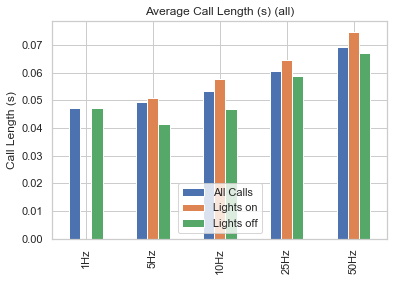

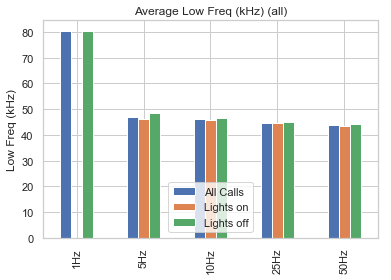

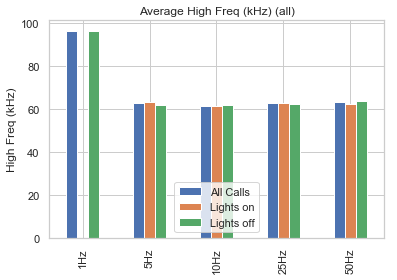

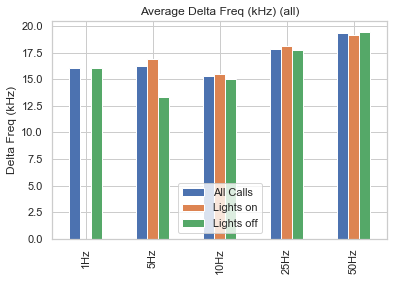

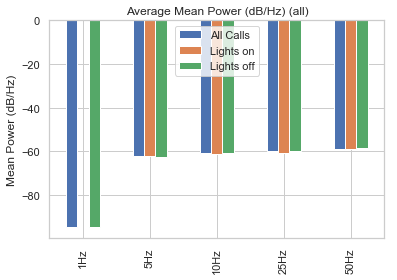

In [18]:
plot_feature('Call Length (s)', '(all)')
plot_feature('Low Freq (kHz)', '(all)')
plot_feature('High Freq (kHz)', '(all)')
plot_feature('Delta Freq (kHz)', '(all)')
plot_feature('Mean Power (dB/Hz)', '(all)')

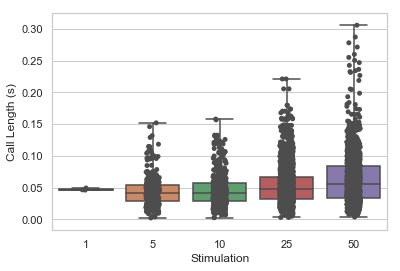

In [30]:
sns.set(style="whitegrid")

ax = sns.boxplot(x="Stimulation", y="Call Length (s)", data=male_df, 
                 order=[1,5,10,25,50], whis=np.inf)

ax = sns.stripplot(x="Stimulation", y="Call Length (s)", data=male_df,
                   order=[1,5,10,25,50], color="0.3")

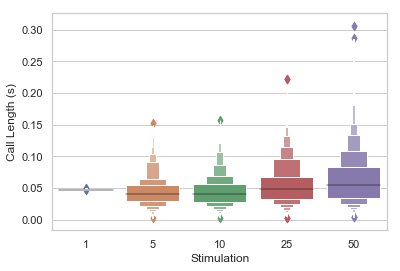

In [29]:
## Use boxenplots for large data containing outliers

ax = sns.boxenplot(x="Stimulation", y="Call Length (s)", data=male_df,
                   order=[1,5,10,25,50])

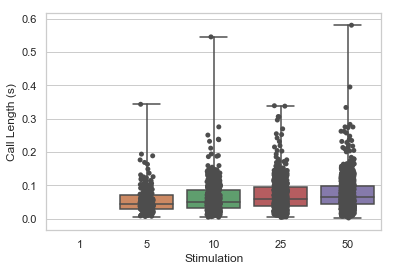

In [36]:
ax = sns.boxplot(x="Stimulation", y="Call Length (s)", data=female_df, 
                 order=[1,5,10,25,50], whis=np.inf)

ax = sns.stripplot(x="Stimulation", y="Call Length (s)", data=female_df,
                   order=[1,5,10,25,50], color="0.3")

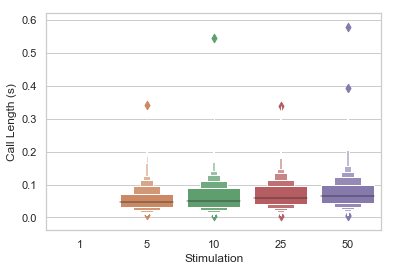

In [35]:
ax = sns.boxenplot(x="Stimulation", y="Call Length (s)", data=female_df,
                   order=[1,5,10,25,50])

# End